In [22]:
#!pip install scikit-optimize -q

#import sklearn
import pandas as pd
import matplotlib.pyplot as plt
# import skopt
import plotly
import numpy as np



In [5]:
df = pd.read_csv('/Users/marcellofelipelli/Documents/DataAnalyticsPortfolio/files/dados_inadimplencia.csv')

df.tail()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
14573,11250.000000,1893.15,12.157324,1,2.0,0.501213,0.591424,0.513171,0.117428,545.0,0
14574,33750.000000,4900.05,17.000000,0,3.0,0.501213,0.563311,0.513171,0.016500,502.0,1
14575,38070.000000,2878.65,12.157324,0,3.0,0.501213,0.748159,0.513171,0.070100,699.0,0
14576,16855.246324,5154.30,7.000000,0,2.0,0.501213,0.559936,0.513171,0.030600,1323.0,0
14577,13500.000000,900.00,12.157324,0,2.0,0.235389,0.342254,0.513171,0.117428,484.0,0


In [6]:
df['inadimplente'].value_counts(normalize=True)

inadimplente
0    0.676499
1    0.323501
Name: proportion, dtype: float64

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14578 entries, 0 to 14577
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   receita_cliente      14578 non-null  float64
 1   anuidade_emprestimo  14578 non-null  float64
 2   anos_casa_propria    14578 non-null  float64
 3   telefone_trab        14578 non-null  int64  
 4   avaliacao_cidade     14578 non-null  float64
 5   score_1              14578 non-null  float64
 6   score_2              14578 non-null  float64
 7   score_3              14578 non-null  float64
 8   score_social         14578 non-null  float64
 9   troca_telefone       14578 non-null  float64
 10  inadimplente         14578 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 1.2 MB


In [8]:
round(df['inadimplente'].value_counts(normalize=True)*100, 2)

inadimplente
0    67.65
1    32.35
Name: proportion, dtype: float64

In [9]:
x = df.drop('inadimplente', axis =1)
y = df['inadimplente']

In [10]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.33, random_state=RANDOM_STATE, stratify=y)

In [11]:
df.nunique()

receita_cliente          292
anuidade_emprestimo     4235
anos_casa_propria         49
telefone_trab              2
avaliacao_cidade           4
score_1                 6483
score_2                12466
score_3                  505
score_social             842
troca_telefone          2843
inadimplente               2
dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
receita_cliente,14578.0,17199.725994,9474.981330,2700.000000,11407.500000,16855.246324,20250.000000,450000.000000
anuidade_emprestimo,14578.0,2760.161782,1267.513387,332.100000,2029.950000,2722.188351,3161.700000,22500.000000
anos_casa_propria,14578.0,12.377257,7.713730,0.000000,12.157324,12.157324,12.157324,69.000000
telefone_trab,14578.0,0.267115,0.442468,0.000000,0.000000,0.000000,1.000000,1.000000
avaliacao_cidade,14578.0,2.046987,0.499302,1.000000,2.000000,2.000000,2.000000,3.000000
score_1,14578.0,0.478113,0.143608,0.017177,0.466333,0.501213,0.501213,0.931287
score_2,14578.0,0.488559,0.197435,0.000005,0.355837,0.526625,0.644467,0.820487
score_3,14578.0,0.509510,0.067365,0.000527,0.513171,0.513171,0.513171,0.866731
score_social,14578.0,0.116576,0.074966,0.000000,0.092800,0.117428,0.117428,1.000000
troca_telefone,14578.0,925.136661,797.499951,0.000000,275.000000,740.000000,1502.000000,4128.000000


In [13]:
from sklearn.tree import DecisionTreeClassifier

modelo_dt = DecisionTreeClassifier(max_depth=3, random_state=RANDOM_STATE)
modelo_dt.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [14]:
from sklearn.metrics import recall_score

recall_dt = recall_score(y_teste, modelo_dt.predict(x_teste))
print(f"Recall do DT = {recall_dt:.3f}")

Recall do DT = 0.143


# Regressão Logistica

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [16]:
logistic_pipeline = make_pipeline(StandardScaler(), LogisticRegression())

In [17]:
logistic_pipeline.fit(x_treino, y_treino)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [18]:
recall_lr = recall_score(y_teste, logistic_pipeline.predict(x_teste))
print(f"Recall do logistic regression = {recall_lr:.3f}")

Recall do logistic regression = 0.253


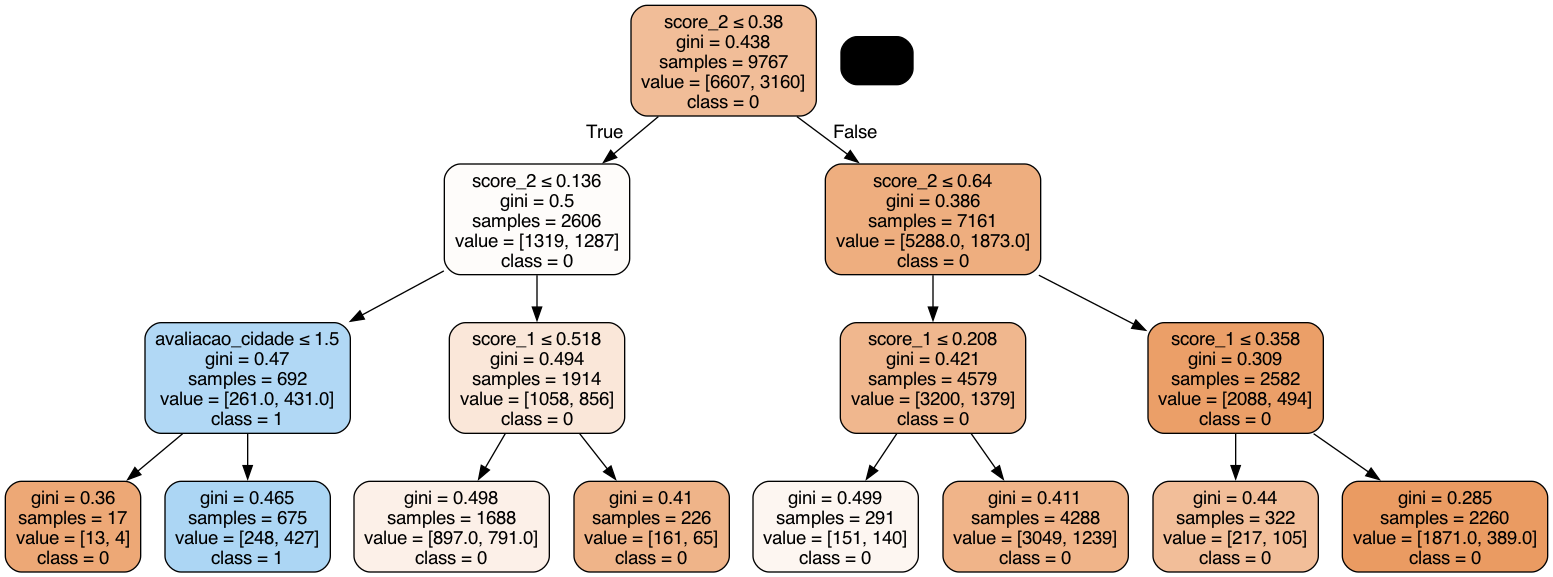

In [20]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth =3, random_state=42)
modelo.fit(x_treino, y_treino)

feature_cols = x_treino.columns
dot_data = StringIO()

export_graphviz(modelo, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols, class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

logistic_pipeline = make_pipeline(StandardScaler(), LogisticRegression())
logistic_pipeline.fit(x_treino, y_treino)

nome_colunas = list(x_treino.columns)
coef_model = logistic_pipeline.named_steps['logisticregression'].coef_[0]
coef_df = pd.DataFrame({"Coluna": nome_colunas, "coeficientes": coef_model})
coef_df.sort_values(by="coeficientes", ascending=False)

,Coluna,coeficientes
4,avaliacao_cidade,0.093488
2,anos_casa_propria,0.078257
1,anuidade_emprestimo,0.036625
0,receita_cliente,-0.012309
3,telefone_trab,-0.031449
8,score_social,-0.074919
9,troca_telefone,-0.097151
7,score_3,-0.149227
5,score_1,-0.250049
6,score_2,-0.464961


In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
import numpy as np

param_grid_dt = {
    'criterion':  ['gini', 'entropy'],
    'max_depth': np.linspace(6, 12, 4, dtype=int),
    'min_samples_split': np.linspace(5, 20, 4, dtype=int),
    'min_samples_leaf': np.linspace(5, 20, 4, dtype=int),
    'max_features': ['sqrt', 'log2'],
    'splitter': ['best', 'random']
}

In [31]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

dt_grid_search = GridSearchCV(estimator = DecisionTreeClassifier(random_state=RANDOM_STATE),
                              param_grid = param_grid_dt,
                              scoring = "recall",
                              n_jobs = -1,
                              cv = cv)

dt_grid_search.fit(x_treino, y_treino)

/opt/homebrew/lib/python3.12/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 6,  8, 10, 12]),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': array([ 5, 10, 15, 20]),
                         'min_samples_split': array([ 5, 10, 15, 20]),
                         'splitter': ['best', 'random']},
             scoring='recall')

In [32]:
dt_grid_search.best_estimator_

DecisionTreeClassifier(max_depth=np.int64(12), max_features='sqrt',
                       min_samples_leaf=np.int64(15),
                       min_samples_split=np.int64(5), random_state=42)

In [33]:
dt_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': np.int64(12),
 'max_features': 'sqrt',
 'min_samples_leaf': np.int64(15),
 'min_samples_split': np.int64(5),
 'splitter': 'best'}

In [34]:
dt_grid_search.cv_results_

{'mean_fit_time': array([0.01100898, 0.00531182, 0.00618987, 0.00203142, 0.00759673,
        0.00203962, 0.00637355, 0.00226278, 0.0063252 , 0.00219808,
        0.00590873, 0.00229511, 0.01028557, 0.00326462, 0.00782313,
        0.0027667 , 0.00640345, 0.00184703, 0.00641246, 0.00241241,
        0.00662217, 0.0018312 , 0.00768661, 0.00214219, 0.00680676,
        0.00270195, 0.00706639, 0.00238013, 0.00761609, 0.00226183,
        0.00648766, 0.00218716, 0.00682321, 0.00245452, 0.00673738,
        0.00333571, 0.00744882, 0.00216966, 0.00757365, 0.00173831,
        0.00666232, 0.00312748, 0.00627823, 0.00284338, 0.0075985 ,
        0.00333042, 0.00821457, 0.00174537, 0.00736489, 0.00249691,
        0.00695181, 0.00233483, 0.00716672, 0.00176506, 0.00552359,
        0.0018949 , 0.00740662, 0.00214529, 0.00722561, 0.00264268,
        0.00755744, 0.00175743, 0.00854573, 0.00395632, 0.00791106,
        0.00196686, 0.01062555, 0.00240779, 0.00856395, 0.0025784 ,
        0.01051974, 0.00214033,

In [41]:
pd.DataFrame(dt_grid_search.cv_results_).sort_values('rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
212,0.010362,0.001910,0.001269,0.000042,gini,12,sqrt,15,15,best,"{'criterion': 'gini', 'max_depth': 12, 'max_fe...",0.242089,0.324367,0.272152,0.245253,0.232595,0.263291,0.033244,1
242,0.009480,0.001712,0.001675,0.000885,gini,12,log2,15,10,best,"{'criterion': 'gini', 'max_depth': 12, 'max_fe...",0.242089,0.324367,0.272152,0.245253,0.232595,0.263291,0.033244,1
246,0.011191,0.001711,0.002102,0.000927,gini,12,log2,15,20,best,"{'criterion': 'gini', 'max_depth': 12, 'max_fe...",0.242089,0.324367,0.272152,0.245253,0.232595,0.263291,0.033244,1


In [36]:
df_cv_results_dt = pd.DataFrame(dt_grid_search.cv_results_)
df_cv_results_dt.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011009,0.001364,0.001715,0.000143,gini,6,sqrt,5,5,best,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.213608,0.145570,0.205696,0.164557,0.200949,0.186076,0.026336,251
1,0.005312,0.001027,0.002396,0.000966,gini,6,sqrt,5,5,random,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.193038,0.132911,0.132911,0.112342,0.161392,0.146519,0.028013,493
2,0.006190,0.000741,0.001569,0.000215,gini,6,sqrt,5,10,best,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.213608,0.145570,0.205696,0.164557,0.200949,0.186076,0.026336,251
3,0.002031,0.000108,0.001220,0.000079,gini,6,sqrt,5,10,random,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.193038,0.132911,0.132911,0.112342,0.161392,0.146519,0.028013,493
4,0.007597,0.000458,0.002095,0.000896,gini,6,sqrt,5,15,best,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.200949,0.145570,0.180380,0.164557,0.204114,0.179114,0.022093,277


In [37]:
df_cv_results_dt.loc[[dt_grid_search.best_index_]]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
208,0.011007,0.001674,0.001518,0.000459,gini,12,sqrt,15,5,best,"{'criterion': 'gini', 'max_depth': 12, 'max_fe...",0.242089,0.324367,0.272152,0.245253,0.232595,0.263291,0.033244,1


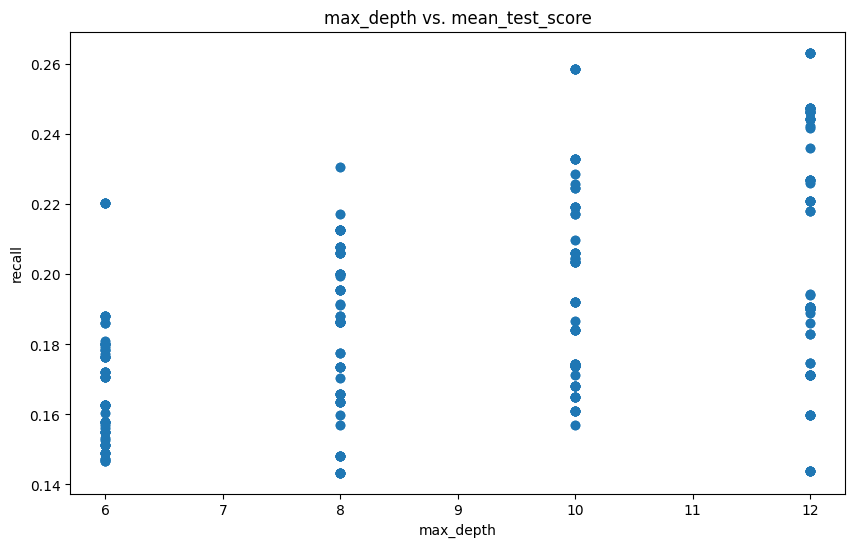

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(
    df_cv_results_dt['param_max_depth'],
    df_cv_results_dt['mean_test_score'],
    )

plt.title('max_depth vs. mean_test_score')
plt.xlabel('max_depth')
plt.ylabel('recall')
plt.show()

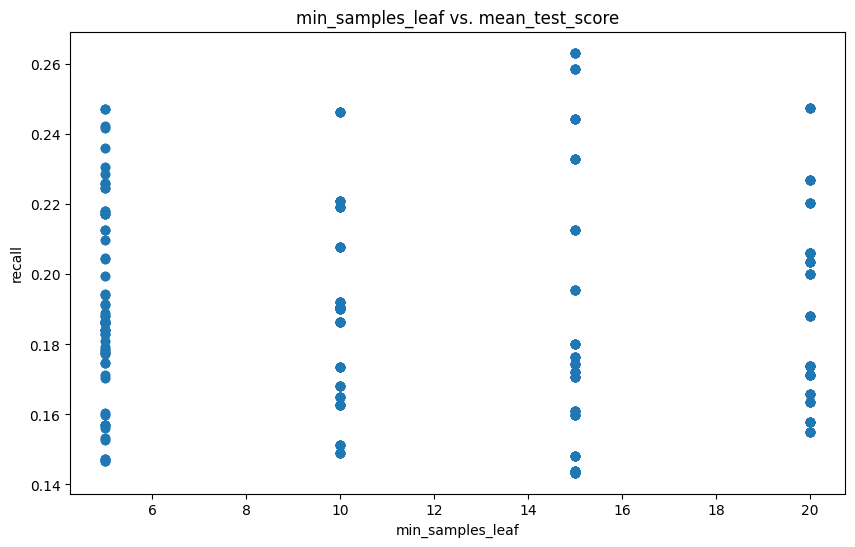

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df_cv_results_dt['param_min_samples_leaf'],
    df_cv_results_dt['mean_test_score'],
    )

plt.title('min_samples_leaf vs. mean_test_score')
plt.xlabel('min_samples_leaf')
plt.ylabel('recall')
plt.show()

In [42]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(shuffle=True, random_state=RANDOM_STATE)

dt_grid_search = GridSearchCV(estimator = DecisionTreeClassifier(random_state=RANDOM_STATE),
                              param_grid = param_grid_dt,
                              scoring = "recall",
                              n_jobs = -1,
                              cv = cv)

dt_grid_search.fit(x_treino, y_treino)

/opt/homebrew/lib/python3.12/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 6,  8, 10, 12]),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': array([ 5, 10, 15, 20]),
                         'min_samples_split': array([ 5, 10, 15, 20]),
                         'splitter': ['best', 'random']},
             scoring='recall')

In [44]:
max_iter = np.linspace(100, 300, 5, dtype=int)
c = [0.001, 0.01, 0.1, 1, 10]

param_grid_lr = [
    {'logisticregression__solver' : ['newton-cg', 'lbfgs'],
      'logisticregression__penalty' : ['l2'],
      'logisticregression__max_iter' : max_iter,
       'logisticregression__C' : c},
    {'logisticregression__solver' : ['liblinear'],
      'logisticregression__penalty' : ['l1', 'l2'],
      'logisticregression__max_iter' : max_iter,
      'logisticregression__C' : c},
]

In [45]:
lr_grid_search = GridSearchCV(estimator = make_pipeline(StandardScaler(), LogisticRegression(random_state=42)),
                               param_grid = param_grid_lr,
                               scoring = "recall",
                               n_jobs = -1,
                               cv = cv)

lr_grid_search.fit(x_treino, y_treino)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'logisticregression__C': [0.001, 0.01, 0.1, 1, 10],
                          'logisticregression__max_iter': array([100, 150, 200, 250, 300]),
                          'logisticregression__penalty': ['l2'],
                          'logisticregression__solver': ['newton-cg', 'lbfgs']},
                         {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10],
                          'logisticregression__max_iter': array([100, 150, 200, 250, 300]),
                          'logisticregression__penalty': ['l1', 'l2'],
                          'logisticregression__solver': ['liblinear']}],
             scoring='recall')

In [46]:
lr_grid_search.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.001, max_iter=np.int64(100),
                                    random_state=42, solver='liblinear'))])

In [47]:
lr_grid_search.best_params_


{'logisticregression__C': 0.001,
 'logisticregression__max_iter': np.int64(100),
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'liblinear'}

In [49]:
df_cv_results_lr = pd.DataFrame(lr_grid_search.cv_results_)
df_cv_results_lr.sort_values(['rank_test_score']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__max_iter,param_logisticregression__penalty,param_logisticregression__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
51,0.011974,0.002443,0.002297,0.000782,0.001,100,l2,liblinear,"{'logisticregression__C': 0.001, 'logisticregr...",0.251582,0.254747,0.265823,0.248418,0.235759,0.251266,0.009723,1
59,0.006158,0.000934,0.001730,0.000685,0.001,300,l2,liblinear,"{'logisticregression__C': 0.001, 'logisticregr...",0.251582,0.254747,0.265823,0.248418,0.235759,0.251266,0.009723,1
57,0.008999,0.002214,0.002453,0.001125,0.001,250,l2,liblinear,"{'logisticregression__C': 0.001, 'logisticregr...",0.251582,0.254747,0.265823,0.248418,0.235759,0.251266,0.009723,1
55,0.006246,0.001167,0.001519,0.000046,0.001,200,l2,liblinear,"{'logisticregression__C': 0.001, 'logisticregr...",0.251582,0.254747,0.265823,0.248418,0.235759,0.251266,0.009723,1
53,0.007287,0.001598,0.001899,0.000683,0.001,150,l2,liblinear,"{'logisticregression__C': 0.001, 'logisticregr...",0.251582,0.254747,0.265823,0.248418,0.235759,0.251266,0.009723,1


In [50]:
df_cv_results_lr.loc[[lr_grid_search.best_index_]]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__max_iter,param_logisticregression__penalty,param_logisticregression__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
51,0.011974,0.002443,0.002297,0.000782,0.001,100,l2,liblinear,"{'logisticregression__C': 0.001, 'logisticregr...",0.251582,0.254747,0.265823,0.248418,0.235759,0.251266,0.009723,1


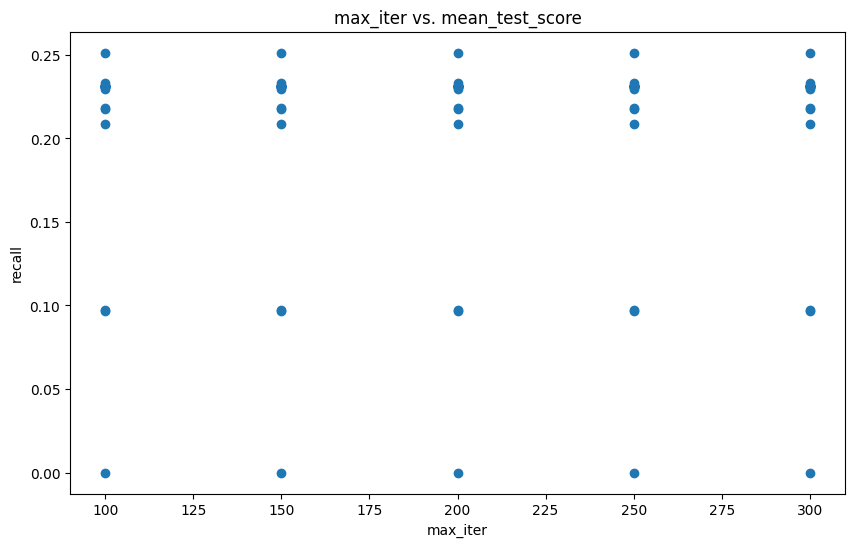

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df_cv_results_lr['param_logisticregression__max_iter'],
    df_cv_results_lr['mean_test_score'],
    )

plt.title('max_iter vs. mean_test_score')
plt.xlabel('max_iter')
plt.ylabel('recall')
plt.show()

In [54]:
from numpy import linspace
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# Definindo a grade de hiperparâmetros
param_grid_knn = {
    'knn__n_neighbors': linspace(5, 25, 10, dtype=int),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

knn_grid_search = GridSearchCV(estimator = pipe_knn,
                               param_grid = param_grid_knn,
                               scoring = "recall",
                               n_jobs = -1,
                               cv = cv)

knn_grid_search.fit(x_treino, y_treino)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': array([ 5,  7,  9, 11, 13, 16, 18, 20, 22, 25]),
                         'knn__weights': ['uniform', 'distance']},
             scoring='recall')

In [55]:
knn_grid_search.best_params_

{'knn__metric': 'manhattan',
 'knn__n_neighbors': np.int64(5),
 'knn__weights': 'distance'}

In [57]:
df_cv_results_knn = pd.DataFrame(knn_grid_search.cv_results_)
df_cv_results_knn.loc[[knn_grid_search.best_index_]]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__metric,param_knn__n_neighbors,param_knn__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
21,0.00778,0.0027,0.20214,0.01803,manhattan,5,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.375,0.370253,0.373418,0.356013,0.357595,0.366456,0.008043,1


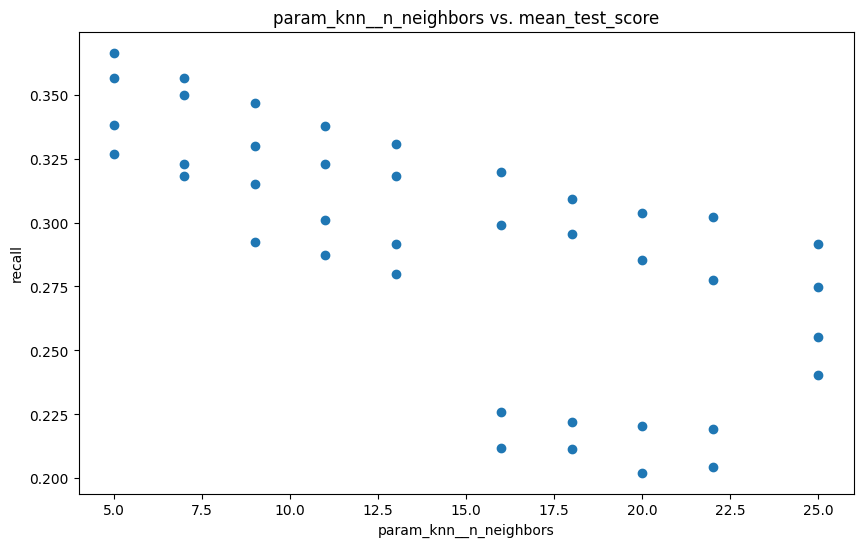

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(
    df_cv_results_knn['param_knn__n_neighbors'],
    df_cv_results_knn['mean_test_score'],
    )

plt.title('param_knn__n_neighbors vs. mean_test_score')
plt.xlabel('param_knn__n_neighbors')
plt.ylabel('recall')
plt.show()

In [59]:
import numpy as np

param_grid_dt = {
    'criterion':  ['gini', 'entropy'],
    'max_depth': np.linspace(6, 12, 4, dtype=int),
    'min_samples_split': np.linspace(5, 20, 4, dtype=int),
    'min_samples_leaf': np.linspace(5, 20, 4, dtype=int),
    'max_features': ['sqrt', 'log2'],
    'splitter': ['best', 'random']
}

In [60]:

cv = StratifiedKFold(shuffle=True, random_state=RANDOM_STATE)

dt_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=RANDOM_STATE),
             param_grid=param_grid_dt,
             scoring="recall",
             n_jobs=-1,
             cv=cv)

dt_grid_search.fit(x_treino, y_treino)

/opt/homebrew/lib/python3.12/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 6,  8, 10, 12]),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': array([ 5, 10, 15, 20]),
                         'min_samples_split': array([ 5, 10, 15, 20]),
                         'splitter': ['best', 'random']},
             scoring='recall')

In [61]:
dt_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': np.int64(12),
 'max_features': 'sqrt',
 'min_samples_leaf': np.int64(15),
 'min_samples_split': np.int64(5),
 'splitter': 'best'}

In [62]:
df_cv_results_dt = pd.DataFrame(dt_grid_search.cv_results_)
df_cv_results_dt.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011257,0.002965,0.004767,0.001876,gini,6,sqrt,5,5,best,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.213608,0.145570,0.205696,0.164557,0.200949,0.186076,0.026336,251
1,0.004924,0.001760,0.003552,0.002664,gini,6,sqrt,5,5,random,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.193038,0.132911,0.132911,0.112342,0.161392,0.146519,0.028013,493
2,0.007295,0.001269,0.001731,0.000394,gini,6,sqrt,5,10,best,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.213608,0.145570,0.205696,0.164557,0.200949,0.186076,0.026336,251


In [63]:
df_cv_results_dt.loc[[dt_grid_search.best_index_]]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
208,0.010639,0.001257,0.00204,0.000917,gini,12,sqrt,15,5,best,"{'criterion': 'gini', 'max_depth': 12, 'max_fe...",0.242089,0.324367,0.272152,0.245253,0.232595,0.263291,0.033244,1


In [ ]:
lr_grid_search = GridSearchCV(estimator = make_pipeline(StandardScaler(), LogisticRegression(random_state=42)),
                               param_grid = param_grid_lr,
                               scoring = "recall",
                               n_jobs = -1,
                               cv = cv)

lr_grid_search.fit(x_treino, y_treino)

NameError: name 'param_grid_lr' is not defined